In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Implementing Kmeans and Heirarchical Clustering on Shopping Dataset

In [4]:
shopping = pd.read_csv("seeds.csv")

In [6]:
shopping.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


#### Heirarchical Clustering

In [7]:
# We just need two columns to plot the dataset and see
# Hence removing all but last two columns
shopping_filter = shopping.iloc[:,3:5].values
len(shopping_filter)

199

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


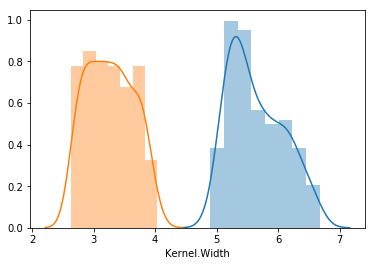

In [8]:
sns.distplot(shopping.iloc[:,3])
sns.distplot(shopping.iloc[:,4])

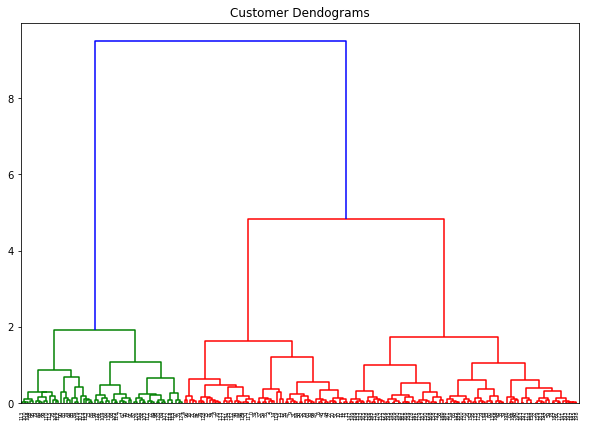

In [9]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(shopping_filter, method='ward'))

##### Agglomerative clustering (aka Heirarchical)
- is bottom up approach of clustering where it starts to build clusters from the points which are placed together!

In [10]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(shopping_filter)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 2, 2, 2, 0, 0, 2,
       1, 1, 1, 1, 1, 0, 1, 3, 3, 0, 0, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1,
       3, 1, 3, 1, 3, 3, 1, 3, 0, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 3, 3,
       3, 1, 3, 3, 3, 3, 1, 0, 1, 0, 1, 1, 1, 3, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2,
       2])

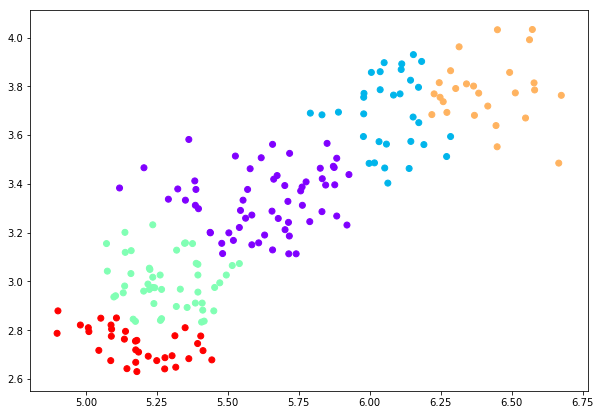

In [11]:
plt.figure(figsize=(10, 7))
plt.scatter(shopping_filter[:,0], shopping_filter[:,1], c=cluster.labels_, cmap='rainbow')

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit_predict(shopping_filter)

array([2, 2, 3, 3, 2, 3, 2, 4, 4, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2,
       0, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 4, 2, 3, 3, 3, 3, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 0, 0, 3, 3, 3, 2, 2, 0,
       4, 4, 4, 4, 4, 2, 4, 1, 1, 4, 2, 4, 1, 1, 1, 4, 4, 1, 1, 1, 1, 4,
       1, 4, 1, 4, 1, 1, 4, 4, 2, 4, 4, 1, 1, 4, 4, 1, 4, 4, 1, 4, 1, 1,
       1, 4, 1, 1, 1, 1, 4, 2, 4, 2, 4, 1, 4, 1, 4, 4, 4, 2, 2, 2, 4, 2,
       2, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0,
       0], dtype=int32)

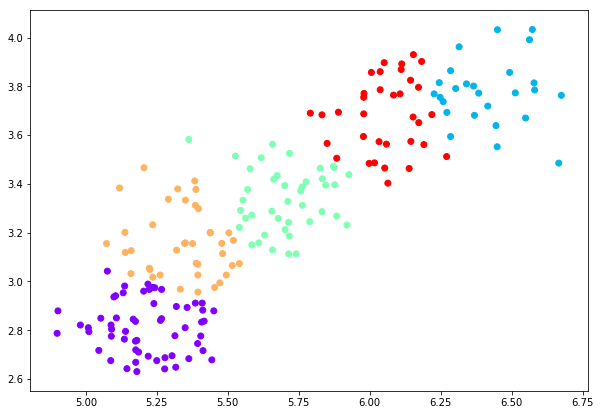

In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(shopping_filter[:,0], shopping_filter[:,1], c=kmeans.labels_, cmap='rainbow')